# CODSOFTINTERNSHIP

 TASK_1 : Titanic Survival Prediction

 AIM : To build a model that predicts whether a
passenger on the Titanic survived or not.

IMPORTING THE LIBRARIES

In [ ]:
#IMPORTIG THE DEPENDENCIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**IMPORTING CSV FILE**

In [ ]:
titanic_test = pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
titanic_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#IDENTIFYING ROWS AND COLUMNS
titanic_test.shape

(891, 12)

In [ ]:
#EXTRACTING INFORMATION OF THE DATA
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#IDENTIFYING THE MISSING VALUES
titanic_test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#DROPTING COLUMN FROM DATAFRAME
titanic_test = titanic_test.drop(columns = 'Cabin', axis = 1)

In [ ]:
#REPLACEMENT OF MISSING IN 'AGE' COLUMN
titanic_test ['Age'].fillna(titanic_test['Age'].mean(), inplace = True)

In [ ]:
titanic_test=titanic_test.dropna()

In [ ]:
titanic_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
titanic_test.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,Q


In [ ]:
titanic_test.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
#Data Analysis of the Titanic
titanic_test.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Analyzing on how many people have survived
titanic_test['Survived'].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

In [ ]:
#Visualizing the Date
sns.set()

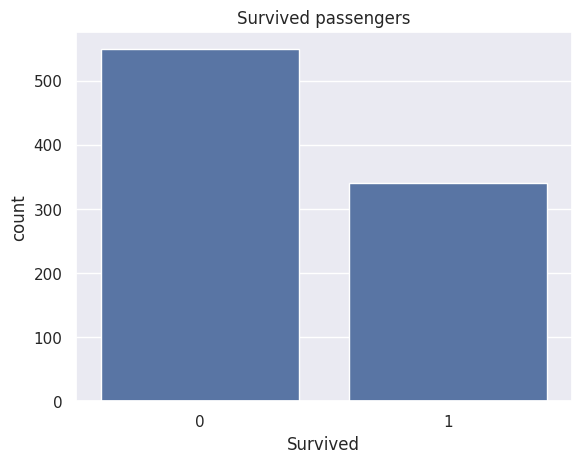

In [ ]:
sns.countplot(x = 'Survived', data = titanic_test).set_title('Survived passengers')
plt.show()

In [ ]:
titanic_test['Sex'].value_counts()

Sex
male      577
female    312
Name: count, dtype: int64

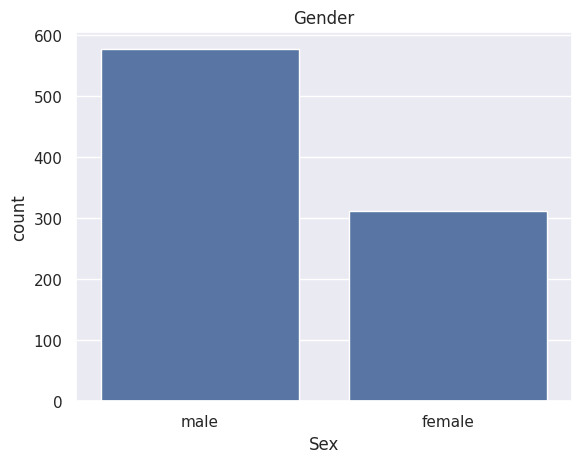

In [ ]:
sns.countplot(x = 'Sex', data = titanic_test).set_title('Gender')
plt.show()

Text(0.5, 1.0, 'Passengers who have survived the collision')

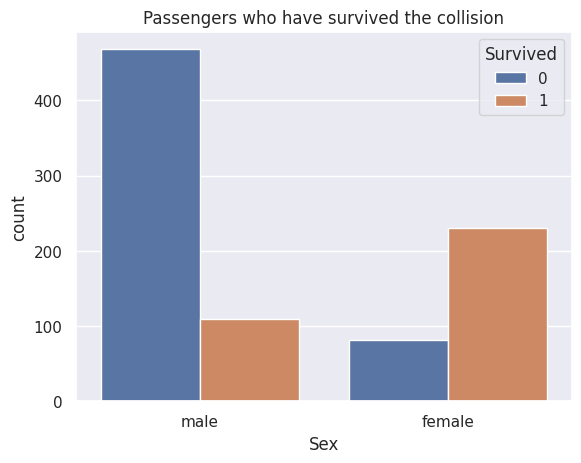

In [ ]:
sns.countplot(x = 'Sex', hue = 'Survived', data = titanic_test).set_title('Passengers who have survived the collision')

Text(0.5, 1.0, 'Number of Passengers in different class.')

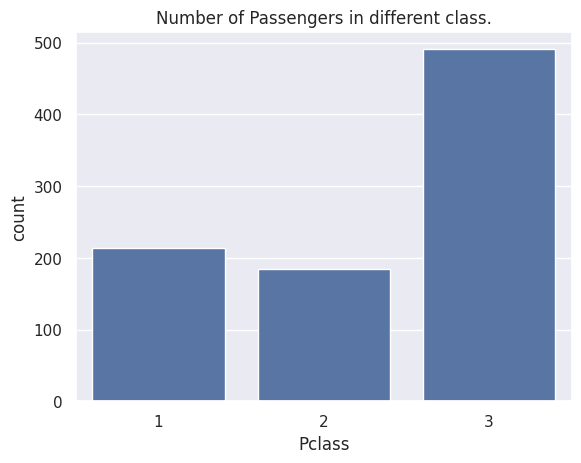

In [ ]:
sns.countplot(x = 'Pclass', data = titanic_test).set_title('Number of Passengers in different class.')

Text(0.5, 1.0, 'Number of Passengers in different class of both Male and Female')

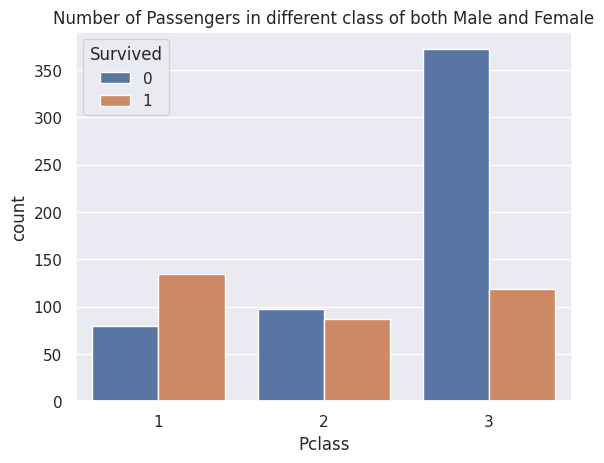

In [ ]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = titanic_test).set_title('Number of Passengers in different class of both Male and Female')

In [ ]:
#Encoding catergorical columns into numerical values
titanic_test['Sex'].value_counts()

Sex
male      577
female    312
Name: count, dtype: int64

In [ ]:
titanic_test['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
titanic_test.replace({'Sex':{'male':1,'female':2}, 'Embarked':{'S':1,'C':2,'Q':3}}, inplace = True)

In [ ]:
titanic_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,1


In [ ]:
X = titanic_test.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Survived'], axis = 1)
Y = titanic_test['Survived']
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    1  22.000000      1      0   7.2500         1
1         1    2  38.000000      1      0  71.2833         2
2         3    2  26.000000      0      0   7.9250         1
3         1    2  35.000000      1      0  53.1000         1
4         3    1  35.000000      0      0   8.0500         1
..      ...  ...        ...    ...    ...      ...       ...
886       2    1  27.000000      0      0  13.0000         1
887       1    2  19.000000      0      0  30.0000         1
888       3    2  29.699118      1      2  23.4500         1
889       1    1  26.000000      0      0  30.0000         2
890       3    1  32.000000      0      0   7.7500         3

[889 rows x 7 columns]


In [ ]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(889, 7) (711, 7) (178, 7)


In [ ]:
titanic_test = pd.get_dummies(X, columns=['Sex'], drop_first=True)

#Model Training
#Using Logistic Regression

model = LogisticRegression(random_state = 0)

#Training model
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
#Evaluation of the Model
#Accuracy Score
X_train_prediction = model.predict(X_train)

In [ ]:
print(X_train_prediction)

[0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0
 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0
 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1
 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1
 1 0 0 1 0 0 0 1 0 1 1 0 

In [ ]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data = ', training_data_accuracy)

Accuracy score of training data =  0.8030942334739803


In [ ]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1
 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0
 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1
 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0
 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0]


In [ ]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data = ', test_data_accuracy)

Accuracy score of test data =  0.797752808988764


In [ ]:
print(Y_test)

560    0
37     0
615    1
170    0
69     0
      ..
377    0
90     0
81     1
592    0
870    0
Name: Survived, Length: 178, dtype: int64


In [ ]:
X_test_prediction = model.predict(X_test)

# Calculating the survival rate
survival_rate = X_test_prediction.mean()

if survival_rate < 1:
    print("Congratulations! You survived.")
else:
    print("I'm sorry, but you have failed to survive.")

Congratulations! You survived.
